## Сравним результаты моделей, которые были обучены на смержиных текстах msmarco

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install import-ipynb;
%cd '/content/drive/My Drive/QA_training/notebooks'
import import_ipynb;
from my_functions import *;

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=a2240c7ddbb502dd4974d8f4c12a0a59d1a52cc32622525ac71b3e6ffd43144f
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
/content/drive/My Drive/QA_training/notebooks
importing Jupyter notebook from my_functions.ipynb
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-e_890eqi
  Running command git clone -q https://github.com/huggingface/transformers /tmp/pip-req-build-e_890eqi
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.9MB 13.7MB/s 
     |████████████████████████████████| 890kB 59.3MB/s 
  Created wheel for transformers: filename=transformers-4.3.0.dev0-cp36-none-any.whl size=1742733 sha256=dd39dc2605b41308449bee892b70aa77e80e07d2b85121111639fdca65b67584
  Stor

In [3]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Модели:

Модели были обученны на трети датасетов, которые скидивал Дмитрий
*   bert - модель, обученная на перовоночальном датасете  
*   same topic bert - модель, обученная на двух смержинных текстах, которые относятся к одному вопросу
*   different topic bert - модель, обученная на двух смержинных текстах, которые относятся к разным темам

Обычные модели -- модели, обученные на 1/3 тринировочного датасета, модели с припиской v2 -- модели, дополнительно доученные на второй трети тренировочного датасета

In [ ]:
model_names = ['bert', 'same topic bert', 'different topics bert']
model_paths = ['/content/drive/MyDrive/QA_training/models/initial_bert_model_1',
               '/content/drive/MyDrive/QA_training/models/msmarco_models/merged_by_2_bert',
               '/content/drive/MyDrive/QA_training/models/merged_bert_model_1']
model_v2_paths = ['/content/drive/MyDrive/QA_training/models/initial_bert_model_2',
                  '/content/drive/MyDrive/QA_training/models/msmarco_models/2_same_topics_ms_bert_2',
                  '/content/drive/MyDrive/QA_training/models/msmarco_models/2_different_topics_ms_bert_2']
model_v3_paths = ['/content/drive/MyDrive/QA_training/models/msmarco_models/inital_bert_model_3',
                  '/content/drive/MyDrive/QA_training/models/msmarco_models/2_same_topics_ms_bert_3',
                  '/content/drive/MyDrive/QA_training/models/msmarco_models/2_different_topics_ms_bert_3']

Датасеты ms-marco:

*   initial dataset - обычный валидационный датасет
*   same topic dataset - датасет, состоящий из  двух смержинных текстах, которые относятся к одному вопросу
*   different topic dataset - датасет, состоящий из  двух смержинных текстах, которые относятся к разным вопросам



In [ ]:
dataset_names = ['initial dataset', 'same topic dataset', 'different topics dataset']
dataset_paths = ['/content/drive/MyDrive/QA_training/datasets_csv/ms_initial_dev.csv',
                 '/content/drive/MyDrive/QA_training/merged datasets/ms_marco/merged_by_2_dev.csv',
                 '/content/drive/MyDrive/QA_training/merged datasets/ms_marco/old_merged_datasets/ms_merged_dev.csv']

In [ ]:
 val_dataset = prepare_and_merge_data(dataset_paths[0], tokenizer, data_type ='msmarco', text_num=1, return_answers=False)
 print("Size of ms-marco dev:" , val_dataset.__len__())

Size of ms-marco dev: 52442


In [ ]:
 train = pd.read_csv('/content/drive/MyDrive/QA_training/datasets_csv/ms_initial_train.csv')
 print("Size of ms-marco train:" , train.shape[0])

Size of ms-marco train: 477580


In [ ]:
 dev = pd.read_csv('/content/drive/MyDrive/QA_training/merged datasets/squad/initial_dev.csv')
 print("Size of squad dev:" , dev.shape[0])

Size of squad dev: 11873


In [ ]:
 train = pd.read_csv('/content/drive/MyDrive/QA_training/merged datasets/squad/initial_train.csv')
 print("Size of squad train:" , train.shape[0])

Size of squad train: 130319


## Оценка качества моделей на валидационных датасетах:

## Первая версия моделей

In [ ]:
table_f1 = np.zeros((3, 3), dtype=object)

In [ ]:
for model_idx in range(len(model_paths)):
    model =  BertForQuestionAnswering.from_pretrained(model_paths[model_idx])
    trainer = Trainer(
                model=model,                         # the instantiated 🤗 Transformers model to be trained
            )
    
    for data_idx in range(len(dataset_paths)):
        print(f"Step {model_idx * len(dataset_paths) + data_idx +1} of {len(dataset_paths)*len(model_paths)}")
        if data_idx == 1:
            val_dataset, answers = prepare_and_merge_data(dataset_paths[data_idx], tokenizer, data_type ='msmarco', text_num=2, return_answers=True)
        else:
            val_dataset, answers = prepare_and_merge_data(dataset_paths[data_idx], tokenizer, data_type ='msmarco', text_num=1, return_answers=True)
        #answers = [ans['text'] for ans in answers]
        results = evaluate_score_squad(trainer, answers, tokenizer, eval_dataset = val_dataset)
        del val_dataset


        table_f1[model_idx, data_idx] = results['f1_mean']

        np.save('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_v2', table_f1)

Step 1 of 9


Step 2 of 9
Step 3 of 9
Step 4 of 9


Step 5 of 9
Step 6 of 9
Step 7 of 9


Step 8 of 9
Step 9 of 9


In [ ]:
table_f1 = np.load('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_v2.npy', allow_pickle=True)
table_f1

## Вторая версия моделей

In [ ]:
model_v2_table_f1 = np.zeros((3, 3), dtype=object)
for model_idx in range(len(model_v2_paths)):
    model =  BertForQuestionAnswering.from_pretrained(model_v2_paths[model_idx])
    trainer = Trainer(
                model=model,                         # the instantiated 🤗 Transformers model to be trained
            )
    
    for data_idx in range(len(dataset_paths)):
        print(f"Step {model_idx * len(dataset_paths) + data_idx +1} of {len(dataset_paths)*len(model_v2_paths)}")
        if data_idx == 1:
            val_dataset, answers = prepare_and_merge_data(dataset_paths[data_idx], tokenizer, data_type ='msmarco', text_num=2, return_answers=True)
        else:
            val_dataset, answers = prepare_and_merge_data(dataset_paths[data_idx], tokenizer, data_type ='msmarco', text_num=1, return_answers=True)
        #answers = [ans['text'] for ans in answers]
        results = evaluate_score_squad(trainer, answers, tokenizer, eval_dataset = val_dataset)
        del val_dataset


        model_v2_table_f1[model_idx, data_idx] = results['f1_mean']

        np.save('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_model_v2', model_v2_table_f1)

Step 1 of 9


Step 2 of 9
Step 3 of 9
Step 4 of 9


Step 5 of 9
Step 6 of 9
Step 7 of 9


Step 8 of 9
Step 9 of 9


## Третья версия моделей

In [ ]:
model_v3_table_f1 = np.zeros((3, 3), dtype=object)
for model_idx in range(len(model_v3_paths)):
    model =  BertForQuestionAnswering.from_pretrained(model_v3_paths[model_idx])
    trainer = Trainer(
                model=model,                         # the instantiated 🤗 Transformers model to be trained
            )
    
    for data_idx in range(len(dataset_paths)):
        print(f"Step {model_idx * len(dataset_paths) + data_idx +1} of {len(dataset_paths)*len(model_v3_paths)}")
        if data_idx == 1:
            val_dataset, answers = prepare_and_merge_data(dataset_paths[data_idx], tokenizer, data_type ='msmarco', text_num=2, return_answers=True)
        else:
            val_dataset, answers = prepare_and_merge_data(dataset_paths[data_idx], tokenizer, data_type ='msmarco', text_num=1, return_answers=True)
        #answers = [ans['text'] for ans in answers]
        results = evaluate_score_squad(trainer, answers, tokenizer, eval_dataset = val_dataset)
        del val_dataset


        model_v3_table_f1[model_idx, data_idx] = results['f1_mean']

        np.save('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_model_v3', model_v3_table_f1)

In [ ]:
#import of data
model_v3_table_f1 = np.load('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_model_v3.npy', allow_pickle=True)

## Отдельное сравнение моделей, обученных на 3 смержинных текстах


In [ ]:
model_names_3t = ['same topic bert', 'different topics bert']
dataset_names = ['same topic dataset', 'different topics dataset']


#Модели обученны на полной версии тренировочного датасета от Дмитрия
model_paths_3t = ['/content/drive/MyDrive/QA_training/models/msmarco_models/3_same_topics_ms_bert_3',
                  '/content/drive/MyDrive/QA_training/models/msmarco_models/3_different_topics_ms_bert_3']
data_paths = ['/content/drive/MyDrive/QA_training/merged datasets/ms_marco/merged_by_3_dev.csv',
              '/content/drive/MyDrive/QA_training/merged datasets/ms_marco/random_merged_by_3_dev.csv']




In [ ]:
table_f1 = np.zeros((2, 2), dtype=object)
for model_idx in range(len(model_paths_3t)):
    model =  BertForQuestionAnswering.from_pretrained(model_paths_3t[model_idx])
    trainer = Trainer(
                model=model,                         # the instantiated 🤗 Transformers model to be trained
            )
    
    for data_idx in range(len(data_paths)):
        print(f"Step {model_idx * len(data_paths) + data_idx +1} of {len(data_paths)*len(model_paths_3t)}")
       
        val_dataset, answers = prepare_and_merge_data(data_paths[data_idx], tokenizer, data_type ='msmarco', text_num=3, return_answers=True)
        results = evaluate_score_squad(trainer, answers, tokenizer, eval_dataset = val_dataset)
        del val_dataset


        table_f1[model_idx, data_idx] = results['f1_mean']

        np.save('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_for_3t', table_f1)

Step 1 of 4


Step 2 of 4
Step 3 of 4


Step 4 of 4


## Сравнение всех моделей 

In [ ]:
dataset_names = ['initial dataset', '2 same topic dataset', '2 different topics dataset', '3 same topic dataset', '3 different topics dataset']
dataset_paths = ['/content/drive/MyDrive/QA_training/datasets_csv/ms_initial_dev.csv',
                 '/content/drive/MyDrive/QA_training/merged datasets/ms_marco/merged_by_2_dev.csv',
                 '/content/drive/MyDrive/QA_training/merged datasets/ms_marco/old_merged_datasets/ms_merged_dev.csv',
                 '/content/drive/MyDrive/QA_training/merged datasets/ms_marco/merged_by_3_dev.csv',
                '/content/drive/MyDrive/QA_training/merged datasets/ms_marco/random_merged_by_3_dev.csv']

model_names = ['bert', '2 same topic bert', '2 different topics bert', '3 same topic bert', '3 different topics bert']
model_paths = ['/content/drive/MyDrive/QA_training/models/msmarco_models/inital_bert_model_3',
                '/content/drive/MyDrive/QA_training/models/msmarco_models/2_same_topics_ms_bert_3',
                '/content/drive/MyDrive/QA_training/models/msmarco_models/2_different_topics_ms_bert_3',
               '/content/drive/MyDrive/QA_training/models/msmarco_models/3_same_topics_ms_bert_3',
                  '/content/drive/MyDrive/QA_training/models/msmarco_models/3_different_topics_ms_bert_3']

In [ ]:
init_f1 = np.load('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_model_v3.npy', allow_pickle=True)
init2_f1 = np.load('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_for_3t.npy', allow_pickle=True)

Сведение результатов, которые были получены ранее, в одну таблицу:

In [ ]:
f1 = np.zeros((5, 5))

In [ ]:
for i in range(3):
  for j in range(3):
    f1[i, j] = init_f1[i, j]
f1

array([[0.57442026, 0.55320584, 0.55547055, 0.        , 0.        ],
       [0.56327548, 0.56231281, 0.5624536 , 0.        , 0.        ],
       [0.5616258 , 0.56458661, 0.5638731 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [ ]:
for i in range(3, 5):
  for j in range(3, 5):
    f1[i,j] = init2_f1[i-3, j-3]
f1

array([[0.57442026, 0.55320584, 0.55547055, 0.        , 0.        ],
       [0.56327548, 0.56231281, 0.5624536 , 0.        , 0.        ],
       [0.5616258 , 0.56458661, 0.5638731 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.55874858, 0.56034654],
       [0.        , 0.        , 0.        , 0.55868972, 0.56078387]])

Сравнение самих результатов:

In [ ]:
for model_idx in range(len(model_paths)):
    model =  BertForQuestionAnswering.from_pretrained(model_paths[model_idx])
    trainer = Trainer(
                model=model,                         # the instantiated 🤗 Transformers model to be trained
            )
    
    for data_idx in range(len(dataset_paths)):
        if f1[model_idx, data_idx] != 0:
            continue

        print(f"Step {model_idx * len(dataset_paths) + data_idx +1} of {len(dataset_paths)*len(model_paths)}")

        if data_idx == 1:
            text_num = 2
        elif data_idx in [0, 2]:
            text_num = 1
        else:
            text_num = 3

        val_dataset, answers = prepare_and_merge_data(dataset_paths[data_idx], tokenizer, data_type ='msmarco', text_num=text_num, return_answers=True)
        results = evaluate_score_squad(trainer, answers, tokenizer, eval_dataset = val_dataset)
        del val_dataset


        f1[model_idx, data_idx] = results['f1_mean']

        np.save('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_all', f1)

Step 4 of 25


Step 5 of 25
Step 9 of 25


Step 10 of 25
Step 14 of 25


Step 15 of 25
Step 16 of 25


Step 17 of 25
Step 18 of 25
Step 21 of 25


Step 22 of 25
Step 23 of 25


# Получившиеся результаты измеренных датасетов по метрике F1:


### Для первой версии моделей:

In [ ]:
df = pd.DataFrame(data=table_f1, index=model_names, columns=dataset_names)
df

,initial dataset,same topic dataset,different topics dataset
bert,0.565563,0.54531,0.543039
same topic bert,0.555131,0.555775,0.55575
different topics bert,0.550937,0.549942,0.550083


In [ ]:
df.to_csv('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_v2.csv')

Результаты получились приктически одинаковые, обычный bert показывает немного лучше результаты на обычном датасете, и хуже на остальных датасеты. Модели, обученные на смержиных датасетах показывают усредненный результат. 

### Для второй версии моделей:

In [ ]:
df_2 = pd.DataFrame(data=model_v2_table_f1, index=model_names, columns=dataset_names)
df_2

,initial dataset,same topic dataset,different topics dataset
bert,0.572757,0.55438,0.555294
same topic bert,0.559573,0.560402,0.559714
different topics bert,0.561981,0.561238,0.561867


In [ ]:
df_2.to_csv('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_model_v2.csv')

Опять модель, обученная на рандомных текстах, показывает результаты лучше, чем модель, обученная на последовательных текстах (в squad dataset была такая же тенденция)

### Для третьей версии моделей:

In [ ]:
df_3 = pd.DataFrame(data=model_v3_table_f1, index=model_names, columns=dataset_names)
df_3

,initial dataset,same topic dataset,different topics dataset
bert,0.57442,0.553206,0.555471
same topic bert,0.563275,0.562313,0.562454
different topics bert,0.561626,0.564587,0.563873


In [ ]:
df_3.to_csv('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_model_v3.csv')

## Для моделей, обученных на 3 текстах

In [ ]:
df = pd.DataFrame(data=table_f1, index=model_names_3t, columns=dataset_names)
df

,same topic dataset,different topics dataset
same topic bert,0.558749,0.560347
different topics bert,0.55869,0.560784


In [ ]:
df.to_csv('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_for_3t.csv')


## Для всех моделей

In [ ]:
f1 = np.load('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_all.npy', allow_pickle=True)

In [ ]:
df = pd.DataFrame(data=f1, index=model_names, columns=dataset_names)
df

,initial dataset,2 same topic dataset,2 different topics dataset,3 same topic dataset,3 different topics dataset
bert,0.574420,0.553206,0.555471,0.534520,0.534833
2 same topic bert,0.563275,0.562313,0.562454,0.557906,0.559908
2 different topics bert,0.561626,0.564587,0.563873,0.558840,0.560237
3 same topic bert,0.560066,0.559815,0.560144,0.558749,0.560347
3 different topics bert,0.558918,0.559849,0.560486,0.558690,0.560784


In [ ]:
df.to_csv(''/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/table_f1_all.npy')

# Проверка длин  получившихся датасетов

1.   Новый пункт
2.   Новый пункт



Проверим, тексты какой длины в токинах подаются моделям в каждом датасете.

In [9]:
#Добавим пути для тренировочных и валидационных датасетов
dataset_names = ['initial texts', 
                 'merged pairs of passages',
                 'merged triples of passages']
dataset_paths = ['/content/drive/MyDrive/QA_training/datasets_csv/ms_initial_train.csv',
                 '/content/drive/MyDrive/QA_training/merged datasets/ms_marco/merged_by_2_train.csv',
                 '/content/drive/MyDrive/QA_training/merged datasets/ms_marco/merged_by_3_train.csv']


In [ ]:
def tokens_len(dataset):
    l = dataset.__len__()
    len_data = []
    for i in pb(range(l)):
        item_len = float(sum(dataset.__getitem__(i)['input_ids'] != 0))
        len_data.append(item_len)
    return {"max_token_len": len(dataset.__getitem__(0)['input_ids']), 
            "len_data": np.array(len_data),
            "dataset_len":dataset.__len__()}

In [ ]:
import json
dataset_lengths = []
for data_idx in range(len(dataset_paths)):
    print(f"Step {data_idx+1} of {len(dataset_paths)}")
    parts_num = 3
    text_num =  data_idx + 1

    val_dataset = prepare_and_merge_data(dataset_paths[data_idx], tokenizer, data_type ='msmarco', text_num=text_num, parts_num = parts_num, return_answers=False)
    
    
    dataset_lengths.append(tokens_len(val_dataset))
    np.save('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/tokens_len.npy', dataset_lengths)
    del(val_dataset)


Step 1 of 3


100% (159193 of 159193) |################| Elapsed Time: 0:07:34 Time:  0:07:34


Step 2 of 3


100% (159193 of 159193) |################| Elapsed Time: 0:10:04 Time:  0:10:04


Step 3 of 3


100% (159193 of 159193) |################| Elapsed Time: 0:11:09 Time:  0:11:09


In [4]:
#import of dataset lengths
dataset_lengths = np.load('/content/drive/MyDrive/QA_training/results/length_comparison_results_for_ms_marco/tokens_len.npy', allow_pickle=True)


Размер входных в модель данных для каждой модели:

In [5]:
for data in dataset_lengths:
  print(data['max_token_len'])

334
452
512


 Размер входных данный для разных датасетов разный, что нехорошо.

Переведем распределение длин текстов в датасетах в таблицу, чтобы было удобнее анализировать

In [6]:
len_data = np.empty(len(dataset_lengths), dtype=object)

for i in range(len(dataset_lengths)):
     len_data[i] = dataset_lengths[i]['len_data']
len_data

array([array([ 70.,  93.,  48., ..., 110.,  53.,  79.]),
       array([104., 143.,  98., ..., 189., 107., 195.]),
       array([149., 175., 152., ..., 250., 151., 307.])], dtype=object)

In [ ]:
df = pd.DataFrame()

In [7]:
import seaborn as sns 
import matplotlib.pyplot as  plt

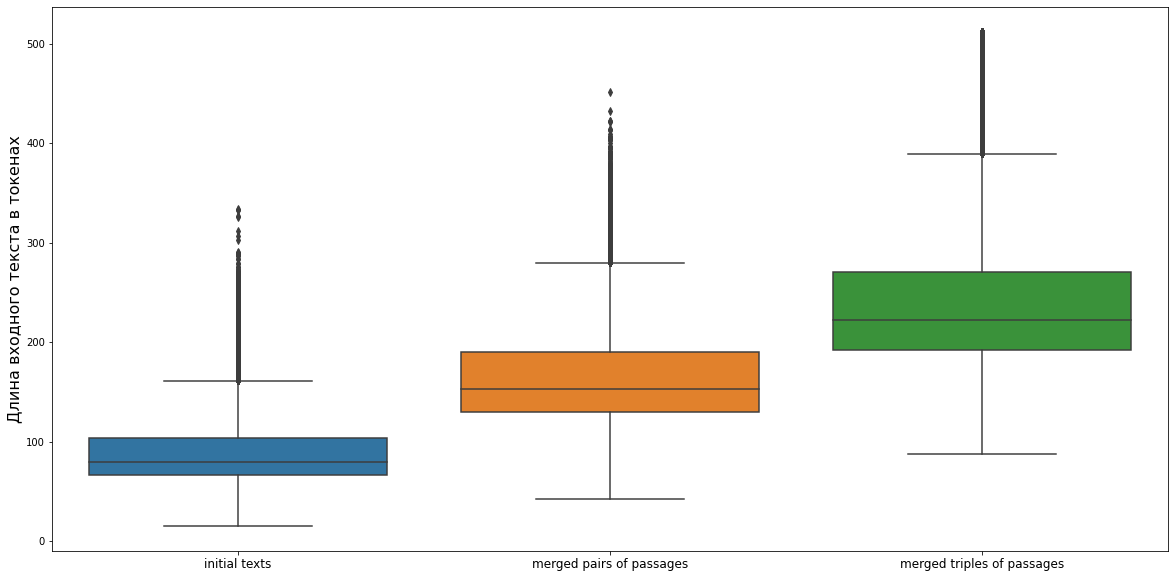

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(data=len_data)
plt.ylabel('Длина входного текста в токенах', fontsize=16)
plt.xticks(np.arange(3), dataset_names, fontsize=12);

На графиках размер смержиных текстов менее чем в 2 раза превышает размеры текстов в обычном датасете, так как здесь учитывается длина вопроса + тексты для ответа.

 Размер входных данный (padding) для разных датасетов разный, что нехорошо.

## Картинки для обзора

Text(0.5, 0, 'Dataset type')

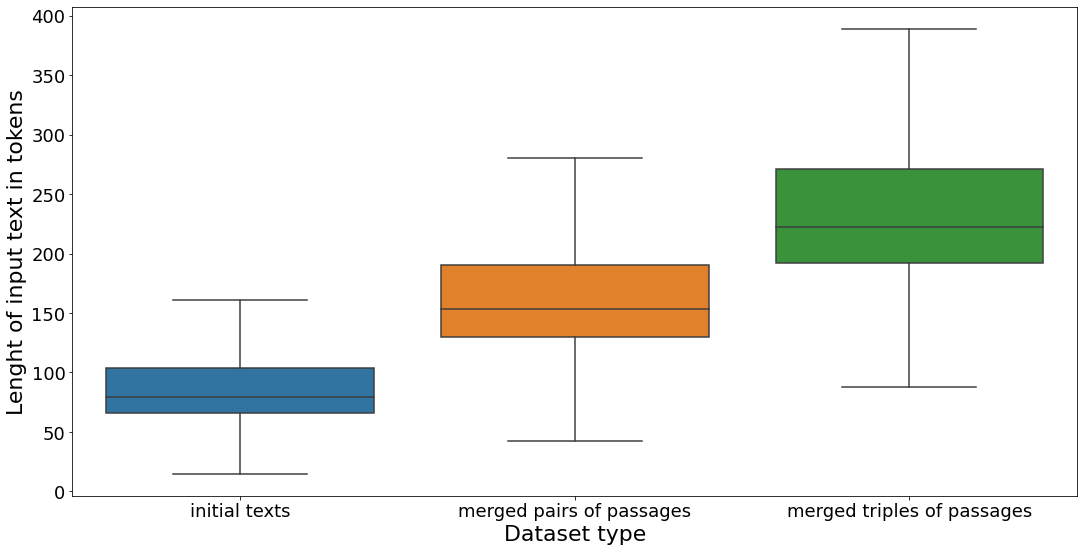

In [12]:
plt.figure(figsize=(18,9))
sns.boxplot(data=len_data, showfliers=False)

#x_names = ['initial texts', 'two passages with \n the same theme', 'two passages with \n different themes']
plt.xticks(np.arange(3), dataset_names, fontsize=18);
plt.yticks(fontsize=18)

plt.ylabel('Lenght of input text in tokens', fontsize=22)
plt.xlabel('Dataset type', fontsize=22)